In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
import glob
import itertools
import os
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [4]:
sys.path.append("../..")

In [13]:
from bertrand.model.tokenization import AA_list
from bertrand.negative_decoys.basic_filtering import basic_filtering as basic_filtering_bertrand
from bertrand.negative_decoys.basic_filtering import (
    read_positives_and_group_by_tcr,
    read_reference_tcrs,
)

In [6]:
# df_pos = read_positives_and_group_by_tcr('../../data/phla_tcr_all.csv.gz')

In [7]:
df_pos = read_positives_and_group_by_tcr("../../data/phla_tcr_unique.csv.gz")

INFO:root:Reading binders from ../../data/phla_tcr_unique.csv.gz
INFO:root:32523 observations, 29329 unique CDR3b sequences


In [15]:
ref_tcrs_oakes = read_reference_tcrs("../../data/oakes_tcr_repertoires/")

INFO:root:Reading reference TCRs from ../../data/oakes_tcr_repertoires/


In [16]:
ref_tcrs_oakes.shape

(574382,)

In [17]:
ref_tcrs_oakes.unique().shape

(521753,)

In [19]:
ref_tcrs_oakes = ref_tcrs_oakes.drop_duplicates()

In [20]:
ref_tcrs_oakes.shape

(521753,)

In [22]:
regex = f"[{''.join(AA_list)}]+"
regex

'[ACDEFGHIKLMNPQRSTVWY]+'

In [27]:
def basic_filtering(cdrs):
    return cdrs[
        (~cdrs.isin(df_pos.CDR3b))
        & (~cdrs.isin(ref_tcrs_oakes))
        & (cdrs.str.len().isin(range(10, 21)))
        & (cdrs.str[0] == "C")
        & cdrs.str.fullmatch(regex)
    ]

In [28]:
ref_tcrs_oakes.shape

(521753,)

In [25]:
# ref_tcrs_oakes = basic_filtering(ref_tcrs_oakes)
# ref_tcrs_oakes.shape

In [19]:
# cellranger_base_dir = '/mnt/storage2/immuno/DATA/single-cell-TCR-generation-datasets/output/cellranger'

# cdrs = []
# for vdj_annot_fn in glob.glob(os.path.join(cellranger_base_dir, '*/outs/all_contig_annotations.csv')):
#     df = pd.read_csv(vdj_annot_fn)
#     # df_cdr3b = df[(df.chain == 'TRB') & df.high_confidence & df.is_cell & df.full_length & df.productive]
#     df_cdr3b = df[(df.chain == 'TRB')]
#     cdrs.append(df_cdr3b.cdr3)

# cdrs = pd.concat(cdrs).reset_index(drop=True)

# len(cdrs)

# cdrs.unique().shape

In [46]:
import zipfile

with zipfile.ZipFile(
    "../../data/dean_tcr_repertoires/dean/hip-samples-tsv.zip", mode="r"
) as archive:
    filenames = [f.filename for f in archive.filelist if f.filename.endswith("tsv")]

    tcr_list = []
    for filename in tqdm(filenames[:85]):
        print(filename)
        df = pd.read_csv(archive.open(filename), sep="\t")
        print(f"{len(df)} TCRs")
        df = df[(df.sequenceStatus == "In") & (df.cloneResolved == "VDJ")]
        print(f"{len(df)} productive TCRs")
        cdrs = df.aminoAcid.dropna().drop_duplicates().reset_index(drop=True)
        print(f"{len(cdrs)} unique CDR3")

        cdrs = basic_filtering(cdrs)
        print(f"{len(cdrs)} OK CDR3")
        tcr_list.append(cdrs)

#     cdrs =
#     dfs[filename] = df

  0%|          | 0/85 [00:00<?, ?it/s]

HIP12091.tsv
156171 TCRs
125686 productive TCRs
117809 unique CDR3
105226 OK CDR3
HIP13939.tsv
267205 TCRs
215599 productive TCRs
198202 unique CDR3
178163 OK CDR3
HIP00169.tsv
115919 TCRs
96254 productive TCRs
92241 unique CDR3
83611 OK CDR3
HIP17454.tsv
290510 TCRs
235586 productive TCRs
215496 unique CDR3
194606 OK CDR3
HIP13294.tsv
279929 TCRs
226852 productive TCRs
206768 unique CDR3
185363 OK CDR3
HIP13376.tsv
411273 TCRs
336283 productive TCRs
304086 unique CDR3
277112 OK CDR3
HIP13978.tsv
274167 TCRs
222845 productive TCRs
203193 unique CDR3
183459 OK CDR3
HIP14124.tsv
365844 TCRs
293251 productive TCRs
263246 unique CDR3
238686 OK CDR3
HIP11857.tsv
269182 TCRs
211661 productive TCRs
196416 unique CDR3
177572 OK CDR3
HIP14494.tsv
460895 TCRs
358202 productive TCRs
321522 unique CDR3
293065 OK CDR3
HIP09789.tsv
388638 TCRs
311965 productive TCRs
282898 unique CDR3
256356 OK CDR3
HIP17534.tsv
338037 TCRs
277348 productive TCRs
253007 unique CDR3
230018 OK CDR3
HIP13961.tsv
165100

<ipython-input-46-8b8fb8beb4f2>:8: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archive.open(filename),  sep='\t')


341828 TCRs
271346 productive TCRs
247884 unique CDR3
224314 OK CDR3
HIP13860.tsv
215255 TCRs
174791 productive TCRs
164057 unique CDR3
146149 OK CDR3
HIP13427.tsv
567651 TCRs
469064 productive TCRs
414186 unique CDR3
376348 OK CDR3
HIP03597.tsv
313900 TCRs
262458 productive TCRs
238065 unique CDR3
215788 OK CDR3
HIP00777.tsv


<ipython-input-46-8b8fb8beb4f2>:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archive.open(filename),  sep='\t')


327902 TCRs
264257 productive TCRs
239862 unique CDR3
216337 OK CDR3
HIP03807.tsv
221593 TCRs
178523 productive TCRs
165252 unique CDR3
148996 OK CDR3
HIP02024.tsv
347237 TCRs
284997 productive TCRs
258929 unique CDR3
236271 OK CDR3
HIP05841.tsv
307028 TCRs
251074 productive TCRs
230514 unique CDR3
208130 OK CDR3
HIP01384.tsv
142144 TCRs
114165 productive TCRs
103811 unique CDR3
92253 OK CDR3
HIP13962.tsv
68798 TCRs
55739 productive TCRs
52387 unique CDR3
46426 OK CDR3
HIP00934.tsv
281766 TCRs
228180 productive TCRs
211536 unique CDR3
190252 OK CDR3
HIP11649.tsv
244737 TCRs
195889 productive TCRs
178473 unique CDR3
160312 OK CDR3
HIP14227.tsv
341036 TCRs
274677 productive TCRs
248617 unique CDR3
225309 OK CDR3
HIP13306.tsv
224639 TCRs
182914 productive TCRs
165169 unique CDR3
148740 OK CDR3
HIP13920.tsv


<ipython-input-46-8b8fb8beb4f2>:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archive.open(filename),  sep='\t')


254114 TCRs
201451 productive TCRs
184033 unique CDR3
166263 OK CDR3
HIP03111.tsv
222097 TCRs
178912 productive TCRs
155382 unique CDR3
139016 OK CDR3
HIP01197.tsv
313976 TCRs
257073 productive TCRs
235181 unique CDR3
212973 OK CDR3
HIP13319.tsv
126631 TCRs
103577 productive TCRs
98616 unique CDR3
86954 OK CDR3
HIP10602.tsv
268860 TCRs
227978 productive TCRs
210206 unique CDR3
190803 OK CDR3
HIP14148.tsv
239707 TCRs
191205 productive TCRs
179056 unique CDR3
162362 OK CDR3
HIP14844.tsv
112515 TCRs
94269 productive TCRs
88476 unique CDR3
78548 OK CDR3
HIP02947.tsv
424493 TCRs
344691 productive TCRs
320126 unique CDR3
290984 OK CDR3
HIP08816.tsv
235120 TCRs
190384 productive TCRs
176811 unique CDR3
161946 OK CDR3
HIP14036.tsv
252635 TCRs
208825 productive TCRs
193211 unique CDR3
172972 OK CDR3
HIP01805.tsv
358816 TCRs
284167 productive TCRs
258890 unique CDR3
233965 OK CDR3
HIP17440.tsv
358634 TCRs
289697 productive TCRs
265556 unique CDR3
241829 OK CDR3
HIP14009.tsv
197832 TCRs
158549 pr

In [37]:
2 / 13

0.15384615384615385

In [47]:
all_tcrs = pd.concat(tcr_list)

In [48]:
all_tcrs.shape

(14725598,)

In [49]:
all_tcrs.value_counts()

CASSLQGGNTEAFF       76
CASSPDRDYGYTF        76
CASSLGQGGETQYF       75
CASSRQGSNQPQHF       75
CASSLTGYGYTF         74
                     ..
CASSLQNGPGFF          1
CASSAPAGGFSTDTQYF     1
CASRIYRGDTEAFF        1
CASSRDRGFGNYEQYF      1
CATGAYNEQSF           1
Name: aminoAcid, Length: 11407093, dtype: int64

In [50]:
unique_tcrs = all_tcrs.drop_duplicates()

In [51]:
unique_tcrs.shape

(11407093,)

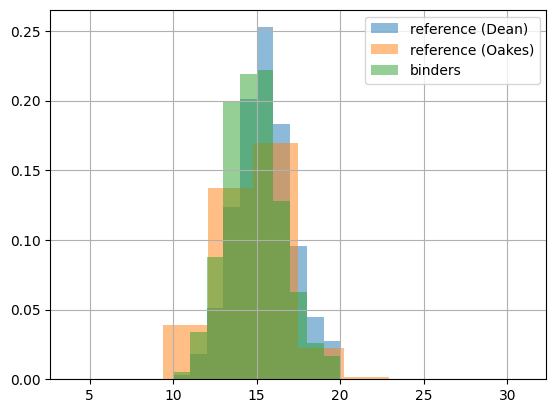

In [54]:
ax = plt.gca()
unique_tcrs.str.len().hist(ax=ax, density=True, alpha=0.5, label="reference (Dean)")
ref_tcrs_oakes.str.len().hist(ax=ax, density=True, alpha=0.5, label="reference (Oakes)")
df_pos.CDR3b.str.len().hist(ax=ax, density=True, alpha=0.5, label="binders")
plt.legend()
plt.show()

In [47]:
def downsample_length(dataset, frac=1):

    pos = dataset[dataset.y == 1]
    neg = dataset[dataset.y == 0]

    pos_count = pos.CDR3b.str.len().value_counts().sort_index()
    neg_count = neg.CDR3b.str.len().value_counts().sort_index()

    ratio = pos_count / neg_count
    max_ratio = ratio.max()

    to_remove = round((neg_count * (max_ratio - ratio)) / max_ratio).astype(int)
    to_sample = neg_count - to_remove

    neg_samples = []
    for length, n_to_sample in to_sample.iteritems():
        neg_sample = neg[neg.CDR3b.str.len() == length].sample(
            int(n_to_sample * frac), random_state=42
        )
        neg_samples.append(neg_sample)
    dataset_downsampled = pd.concat([pos] + neg_samples)
    return dataset_downsampled

In [52]:
unique_tcrs.shape

(11407093,)

In [56]:
ref_tcrs_dean = basic_filtering_bertrand(unique_tcrs, df_pos)

INFO:root:Basic filtering: started with 11407093 reference TCRs, 11407093 after filtering


In [57]:
ref_tcrs_dean = ref_tcrs_dean.rename(columns={"CDR3b": "junction_aa"}).drop(columns="y")

In [58]:
ref_tcrs_dean.sample(5)

,junction_aa
1915758,CASSLADLGGLEQYF
453050,CASRYGGSSDTQYF
2007832,CASSTAGPPQFWAGTDTQYF
7020283,CASSFVRLEQFF
4305700,CASSEAQGAEETQYF


In [61]:
ref_tcrs_dean.to_csv("../../data/dean_tcr_repertoires/dean_downsampled_11M.csv.gz")

In [62]:
d = pd.read_csv('../../data/presented_peptides.csv.gz', index_col=0)

In [63]:
d.head()

,HLA_type,Peptide2,is_presented
abelin_pos_1,A02:01,KLWEMDNMLI,1
abelin_pos_2,A02:03,KLYDIDVAKV,1
abelin_pos_4,A02:07,QVDDLKAKL,1
abelin_pos_6,A24:02,AYVHMVTHF,1
abelin_pos_10,B35:01,LPDEIYHVY,1


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/dean_tcr_repertoires/dean_downsampled_11M.csv.gz')

In [3]:
df.shape

(11407093, 2)

In [4]:
df2 = pd.read_csv('/mnt/storage2/olek/bertrand-rep3/pretraining/mlm_train.csv.gz')


In [5]:
df2.shape

(9125674, 4)

In [6]:
df3 = pd.read_csv('/mnt/storage2/olek/bertrand-rep3/pretraining/mlm_val.csv.gz')

In [7]:
df3.shape

(2281419, 4)